<center>
    <strong>
        <font color='black' size=5>Determining Diabetes Risk Factors Using Feature Selection</font> <br> <br>
        <font color='black' size=5>Reitumetse Masilo - 1836124</font>
    </strong>
</center>

<br><br>
<center>
    <strong>
        <font color='black' size=5>Imports</font> <br><br>
    </strong>
</center>

In [1]:
import time
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.feature_selection import RFE
from IPython.display import display as disp
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel

<br><br>
<center>
    <strong>
        <font color='black' size=5>About the dataset </font> <br> <br>
    </strong>
</center>

<br> <br>

| Feature | Description | 0 | 1 |
| :- | :- | :- | :- |
|Diabetes_012 | Is the person diabetic? | no | yes |
| HighBP | Does the person have high blood pressure? | no | yes |
| HighChol | Does the person have high cholesterol| no | yes |
| CholCheck | Has the person had a cholesterol check in the last 5 years? | no | yes |
| BMI | Body Mass Index. | - | - |
| Smoker | Have you smoked at least 100 cigarettes in your entire life? | no | yes |
| Stroke | Has the person ever had a stroke? | no | yes |
| HeartDiseaseorAttack | coronary heart disease (CHD) or myocardial infarction (MI). | no | yes |
| PhysActivity | physical activity in past 30 days - not including job. | no | yes |
| Fruits | Consume Fruit 1 or more times per day. | no | yes |
| Veggies | Consume Vegetables 1 or more times per day. | no | yes |
| HvyAlcoholConsump | Heavy drinkers (adult men having more than 14 drinks per week and adult women having more than 7 drinks per week). | no | yes |
| AnyHealthcare | Have any kind of health care coverage, including health insurance, prepaid plans such as HMO, etc. | no | yes |
| NoDocbcCost | Was there a time in the past 12 months when you needed to see a doctor but could not because of cost? | no | yes |
| GenHlth | - | - | - |
| MentHlth | - | - | - |
| PhysHlth | - | - | - |
| DiffWalk | Do you have serious difficulty walking or climbing stairs? | no | yes |
| Sex | - | female | male |
| Age | - | - | - |
| Education | - | - | - |
| Income | - | - | - |

<br> <br>

**GenHlth** <br>
Would you say that in general your health is: (scale 1-5) 
1. excellent 
2. very good 
3. good 
4. fair 
5. poor <br>

**MentHlth** <br>
For how many days during the past 30 days was your mental health not good? Scale 1-30 days. <br>

**PhysHlth** <br>
For how many days during the past 30 days was your physical health not good? Scale 1-30 days. <br>

**Age** <br>
13-level age category (_AGEG5YR see codebook) 
1. 18-24 
9. 60-64 
13. 80 or older. <br>

**Education** <br>
Education level (EDUCA see codebook) (scale 1-6) 
1. Never attended school or only kindergarten 
2. Grades 1 through 8 (Elementary) 
3. Grades 9 through 11 (Some high school) 
4. Grade 12 or GED (High school graduate) 
5. College 1 year to 3 years (Some college or technical school) 
6. College 4 years or more (College graduate). <br>

**Income** <br>
Income scale (INCOME2 see codebook) (scale 1-8) 
1. less than \$10,000 
5. less than \$35,000 
8. \$75,000 or more. <br>

<br><br>
<center>
    <strong>
        <font color='black' size=5>Data Processing</font> <br> <br>
    </strong>
</center>

In [2]:
# Read in data
data = pd.read_csv('diabetes_5050.csv')

In [3]:
# Display dataframe summary
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Diabetes_binary       70692 non-null  float64
 1   HighBP                70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   Stroke                70692 non-null  float64
 7   HeartDiseaseorAttack  70692 non-null  float64
 8   PhysActivity          70692 non-null  float64
 9   Fruits                70692 non-null  float64
 10  Veggies               70692 non-null  float64
 11  HvyAlcoholConsump     70692 non-null  float64
 12  AnyHealthcare         70692 non-null  float64
 13  NoDocbcCost           70692 non-null  float64
 14  GenHlth               70692 non-null  float64
 15  MentHlth           

**There are no null values in the dataset.** <br><br>

In [4]:
# Check for null values
data.isnull().any()

Diabetes_binary         False
HighBP                  False
HighChol                False
CholCheck               False
BMI                     False
Smoker                  False
Stroke                  False
HeartDiseaseorAttack    False
PhysActivity            False
Fruits                  False
Veggies                 False
HvyAlcoholConsump       False
AnyHealthcare           False
NoDocbcCost             False
GenHlth                 False
MentHlth                False
PhysHlth                False
DiffWalk                False
Sex                     False
Age                     False
Education               False
Income                  False
dtype: bool

In [5]:
# Check for duplicates
data.duplicated().any()

True

**The dataset consists of duplicates. Let's remove them.** <br><br>

In [6]:
# Drop duplicates
data.drop_duplicates(keep=False, inplace=True)
data.reset_index(drop=True, inplace=True)

# Check for duplicates
data.duplicated().any()

False

**The duplicates have been removed from the dataset.** <br><br>

In [7]:
# Check number of diabetic and non diabetic patients
n = data.shape[0]
n1 = data[data['Diabetes_binary'] == 1].shape[0]
n2 = data[data['Diabetes_binary'] == 0].shape[0]

print('In total, there are ', n, ' people in the dataset.')
print('There are ', n1, ' diabetic people in the dataset.')
print('There are ', n2, ' non-diabetic people in the dataset.')

In total, there are  67889  people in the dataset.
There are  34867  diabetic people in the dataset.
There are  33022  non-diabetic people in the dataset.


**Let's look at our data.**

In [8]:
# Display data
data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,18.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,2.0,7.0,0.0,0.0,0.0,1.0,4.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67884,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
67885,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
67886,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
67887,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


**We can notice that some columns (eg. BMI, PhysHlth, etc. ) have large values instead of values ranging between 0 and 1. we will use min-max scaling to convert these values to values that lie between 0 and 1.**

<br><br>
<center>
    <strong>
        <font color='black' size=5>Min-Max Scaling</font> <br> <br>
    </strong>
</center>

In [9]:
def minmax(x):
    return (x - x.min()) / (x.max() - x.min())

In [10]:
data['BMI'] = minmax(data['BMI'])
data['GenHlth'] = minmax(data['GenHlth'])
data['MentHlth'] = minmax(data['MentHlth'])
data['PhysHlth'] = minmax(data['PhysHlth'])
data['Age'] = minmax(data['Age'])
data['Education'] = minmax(data['Education'])
data['Income'] = minmax(data['Income'])

In [11]:
# Display data
data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.50,0.166667,1.000000,0.0,1.0,0.250000,1.0,1.000000
1,0.0,1.0,1.0,1.0,0.162791,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,0.50,0.000000,0.000000,0.0,1.0,0.916667,1.0,1.000000
2,0.0,0.0,0.0,1.0,0.162791,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.00,0.000000,0.333333,0.0,1.0,1.000000,1.0,1.000000
3,0.0,1.0,1.0,1.0,0.186047,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,0.50,0.000000,0.100000,0.0,1.0,0.833333,1.0,1.000000
4,0.0,0.0,0.0,1.0,0.069767,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.25,0.233333,0.000000,0.0,0.0,0.000000,0.6,0.857143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67884,1.0,0.0,1.0,1.0,0.290698,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.75,0.000000,0.000000,0.0,0.0,0.416667,0.6,0.000000
67885,1.0,0.0,1.0,1.0,0.197674,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,0.25,0.000000,0.000000,1.0,1.0,0.750000,0.4,0.714286
67886,1.0,1.0,1.0,1.0,0.151163,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,1.00,0.500000,0.000000,1.0,0.0,1.000000,1.0,0.428571
67887,1.0,1.0,1.0,1.0,0.069767,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.75,0.000000,0.000000,1.0,0.0,0.833333,0.2,0.428571


**Now all our values lie between the range [0, 1].**

<br><br>
<center>
    <strong>
        <font color='black' size=5>Visualisations</font> <br> <br>
    </strong>
</center>

<strong><font color='maroon' size=4>Histograms</font></strong>

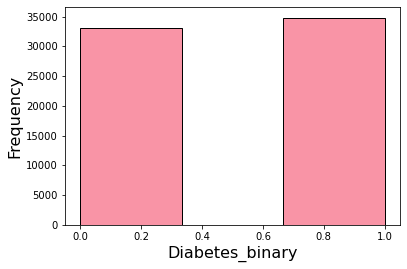

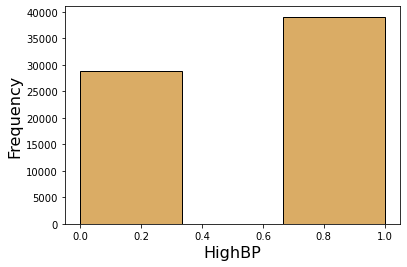

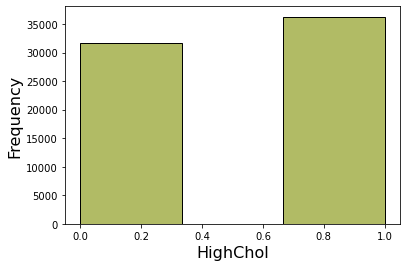

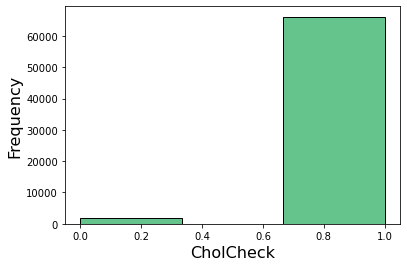

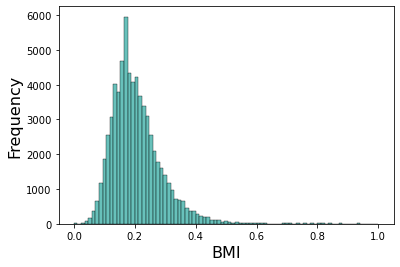

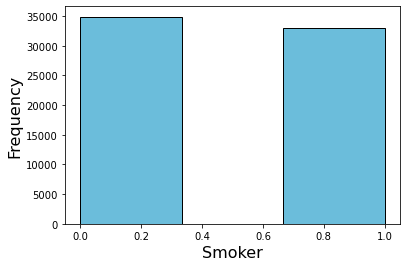

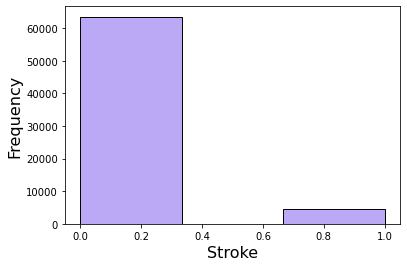

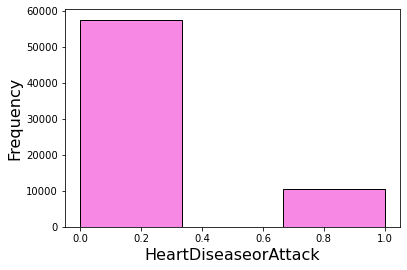

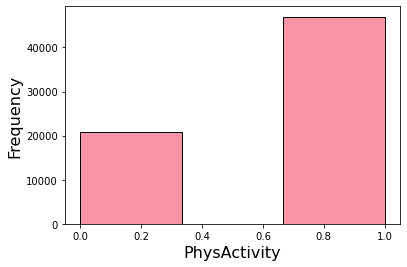

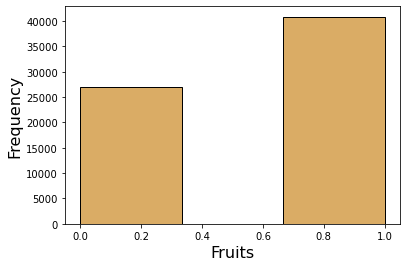

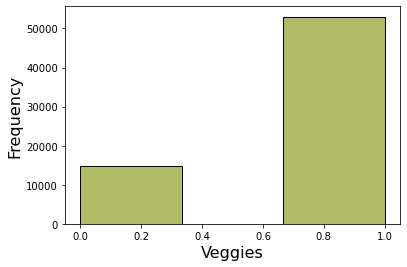

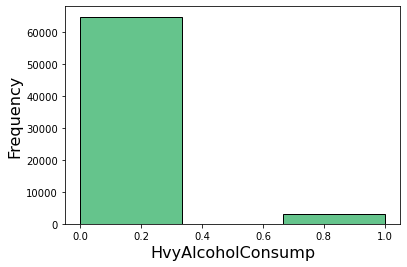

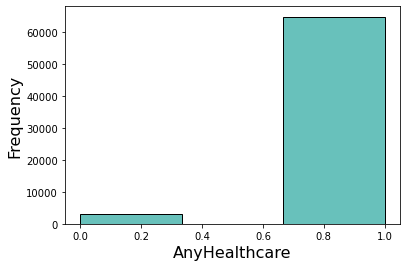

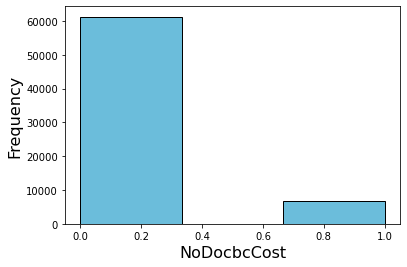

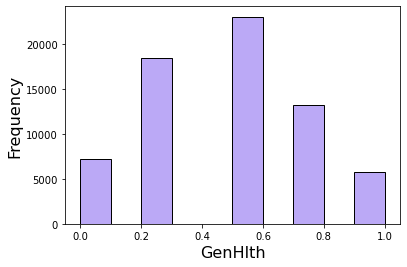

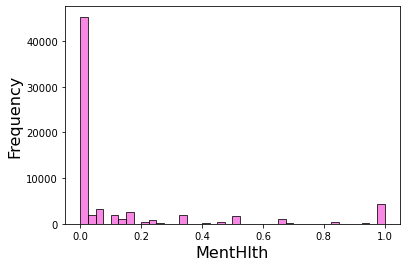

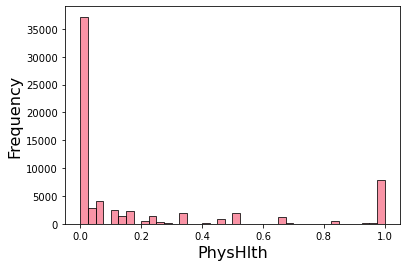

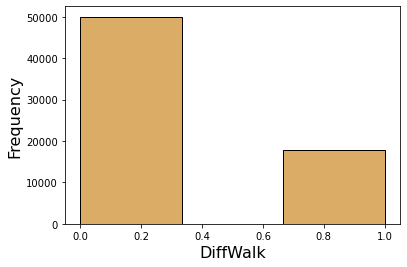

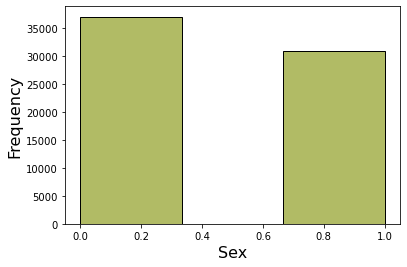

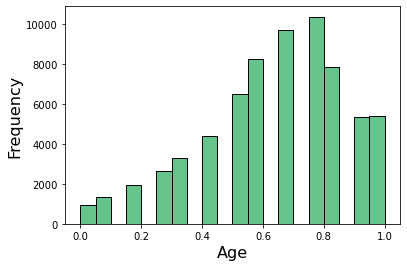

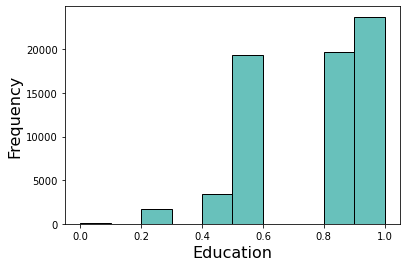

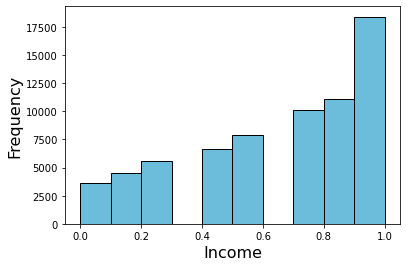

In [12]:
# Plot histograms for each column
num_bins = 4
colour_index = 0
cols = data.columns
colours = sns.color_palette("husl", 8)

for i in cols:
    # Get the number of unique values in each column
    num_unique = data[i].unique().shape[0]
    
    # Reset index if out of bounds
    if colour_index >= 8:
        colour_index = 0
    
    # Determine the number of bins for each histogram
    if num_unique == 2:
        num_bins = 3
        
    elif num_unique > 2 and num_unique < 10:
        num_bins = 10
        
    elif num_unique >= 10 and num_unique < 20:
        num_bins = 20
        
    elif num_unique >= 30 and num_unique < 40:
        num_bins=40
        
    else:
        num_bins = 85
        
    # Plot histogram
    sns.histplot(data[i], kde=False, color=colours[colour_index], bins=num_bins)
    plt.xlabel(i, fontsize=16)
    plt.ylabel('Frequency', fontsize=16)
    plt.show()
    
    # Increment colour index
    colour_index += 1

<strong><font color='maroon' size=4>Correlation Matrix</font></strong>

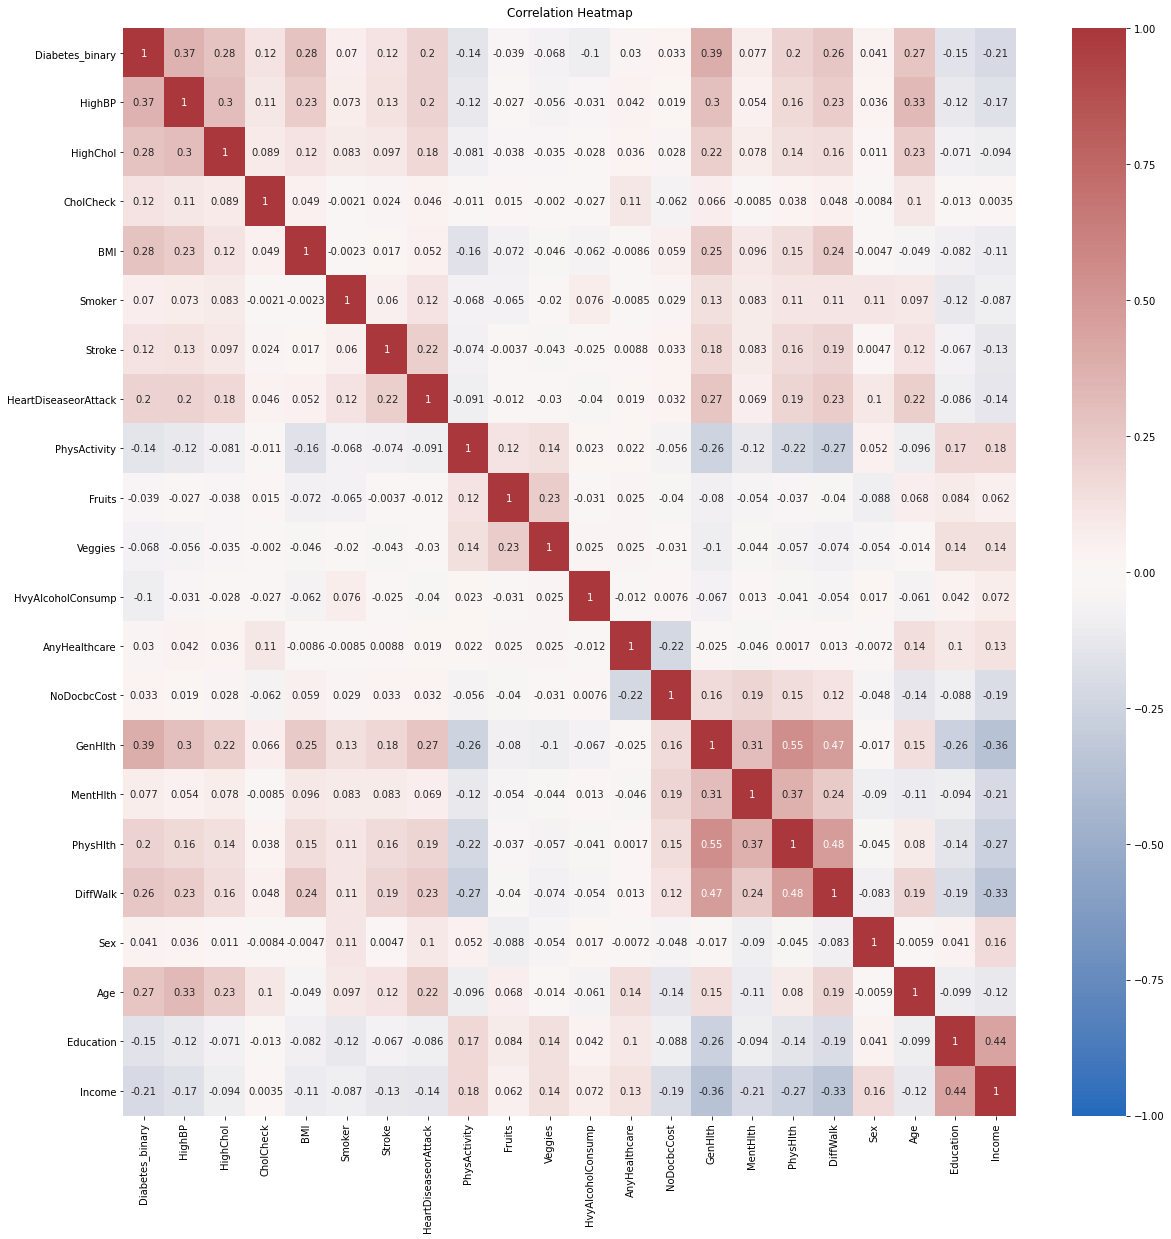

In [13]:
# Correlation Matrix
c_mat = data.corr(method='pearson')

# Colour scheme
hc= sns.color_palette("vlag", as_cmap=True)

# Plot heatmap
heatmap = plt.subplots(figsize=(20, 20))
heatmap = sns.heatmap(c_mat, vmin=-1, vmax=1, annot=True, cmap=hc, )
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

In [14]:
# Sort features according to correlation between feature and diabetes
c_matrix = pd.DataFrame(c_mat['Diabetes_binary'])
c_matrix['diabetes_absolute'] = abs(c_matrix['Diabetes_binary'])
c_matrix.sort_values(by='diabetes_absolute', ascending=False, inplace=True)

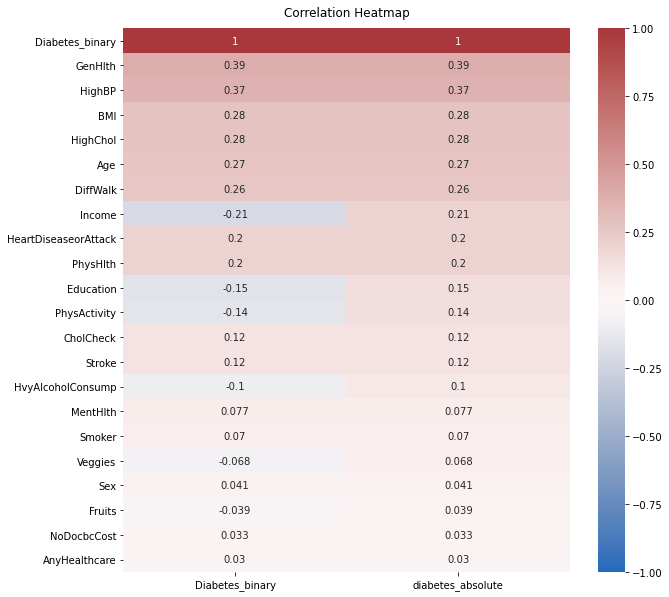

In [15]:
# Plot heatmap
heatmap = plt.subplots(figsize=(10, 10))
heatmap = sns.heatmap(c_matrix, vmin=-1, vmax=1, annot=True, cmap=hc, )
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

**Looking at the correlation matrix (using Pearson's Correlation Method), we can see that there is no strong correlation between diabetes and any of the features.**

**There is a moderate correlation between:**
* **HighBP (Blood pressure)**
* **Genearal Health**

**There is a weak correlation between diabetes and the rest of the features.**

**Let's see if other methods (Recursive Feature Elimination and Regularized Trees) rank the features the same in terms of importance.**

<br><br>
<center>
    <strong>
        <font color='black' size=5>Machine Learning</font> <br> <br>
    </strong>
</center>

<strong><font color='maroon' size=4>Data preparation</font></strong>

In [16]:
# Split data into X and y
X = data.drop(columns='Diabetes_binary')
y = data['Diabetes_binary']

# Split data into training and testing
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.25, random_state=42)

print("The dimensions of the training (X) dataset is: ", train_X.shape)
print("The dimensions of the training (y) dataset is: ", train_y.shape)
print("The dimensions of the testing (X) dataset is: ", test_X.shape)
print("The dimensions of the testing (y) dataset is: ", test_y.shape)

The dimensions of the training (X) dataset is:  (50916, 21)
The dimensions of the training (y) dataset is:  (50916,)
The dimensions of the testing (X) dataset is:  (16973, 21)
The dimensions of the testing (y) dataset is:  (16973,)


<br><br>
<center>
    <strong>
        <font color='teal' size=5>Recursive Feature Elimination</font> <br> <br>
    </strong>
</center>

<strong><font color='maroon' size=4>Store important data</font></strong>

In [17]:
"""
n_features: The number of features in the subset.
time: Time taken to obtain the most important features (in seconds).
features: A list of the most important features.

"""

rfe_stats = pd.DataFrame(columns=['n_features', 'time', 'features'])

<strong><font color='maroon' size=4>Get subsets of important features</font></strong>

In [18]:
# Number of features we want
n_feat = [15, 10, 8, 5, 3]

for i in n_feat:
    # Init the transformer
    rfe = RFE(estimator=svm.SVC(kernel='linear'), n_features_to_select=i)

    # Fit to the training data
    t0 = time.time()
    rfe.fit(train_X, train_y)
    t1 = time.time()
    
    # Time taken to get features
    t = abs(t1- t0)

    # Get the important features
    cols = rfe.get_support(indices=True)
    selected_columns = train_X.iloc[:,cols].columns.tolist()
    
    # Append data to dataframe
    rfe_stats.loc[rfe_stats.shape[0]] = [i, t, selected_columns]

<strong><font color='maroon' size=4>Display subsets of important features</font></strong>

In [19]:
# Display the data we stored
rfe_stats

,n_features,time,features
0,15,685.720934,"[HighBP, HighChol, CholCheck, BMI, Stroke, Hea..."
1,10,1218.129452,"[HighBP, HighChol, CholCheck, BMI, HeartDiseas..."
2,8,1325.280394,"[HighBP, HighChol, CholCheck, BMI, HvyAlcoholC..."
3,5,1551.561300,"[HighBP, CholCheck, BMI, GenHlth, Age]"
4,3,1623.249444,"[BMI, GenHlth, Age]"


In [20]:
# Number of features we want
rfe_subsets = [train_X.columns.to_list()]

# Display the subsets of features
for i, n in enumerate(n_feat):
    subset = list(rfe_stats.features.loc[i])
    rfe_subsets.append(subset)
    print("Recursive Feature Elimination for ", n, " features: ")
    print(subset)
    print()

Recursive Feature Elimination for  15  features: 
['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Stroke', 'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income']

Recursive Feature Elimination for  10  features: 
['HighBP', 'HighChol', 'CholCheck', 'BMI', 'HeartDiseaseorAttack', 'HvyAlcoholConsump', 'GenHlth', 'PhysHlth', 'Age', 'Income']

Recursive Feature Elimination for  8  features: 
['HighBP', 'HighChol', 'CholCheck', 'BMI', 'HvyAlcoholConsump', 'GenHlth', 'Age', 'Income']

Recursive Feature Elimination for  5  features: 
['HighBP', 'CholCheck', 'BMI', 'GenHlth', 'Age']

Recursive Feature Elimination for  3  features: 
['BMI', 'GenHlth', 'Age']



<br><br>
<center>
    <strong>
        <font color='teal' size=5>Testing model performance with different numbers of features</font> <br> <br>
    </strong>
</center>

<strong><font color='maroon' size=4>Functions</font></strong>

In [21]:
def accuracy(cm):
    tn, fp, fn, tp = cm.ravel()
    
    return (tp+tn) / max((tp+tn+fp+fn), 1)

def precision(cm):
    tn, fp, fn, tp = cm.ravel()
    
    return tp / max((tp+fp), 1)

def recall(cm):
    tn, fp, fn, tp = cm.ravel()
    
    return tp / max((tp+fn), 1)

def f1_score(cm):
    prec = precision(cm)
    rec = recall(cm)
    
    return (2*prec*rec) / max((prec+rec), 1)

In [22]:
def performance(cm):
    acc = np.round(accuracy(cm), 4)
    prec = np.round(precision(cm), 4)
    rec = np.round(recall(cm), 4)
    f1 = np.round(f1_score(cm), 4)
    
    # Plot confusion matrix
    sns.heatmap(cm, annot=True, cmap= 'Blues',  fmt='d', cbar=True)
    plt.xlabel('Predicted Values')
    plt.ylabel('True Values')
    plt.title('Confusion Matrix')
    plt.show()
    
    # Print metrics
    print("The model achieved an accuracy of: ", acc)
    print("The model achieved a precision of: ", prec)
    print("The model achieved a recall of: ", rec)
    print("The model achieved an f1-score of: ", f1)
    
    return [acc, prec, rec, f1]

<strong><font color='maroon' size=4>Store important data</font></strong>

In [23]:
# Stats
test_stats = pd.DataFrame(columns=['classifier', 'n_features', 'train_time', 'accuracy', 'precision', 'recall', 'f1_score'])
test_stats

,classifier,n_features,train_time,accuracy,precision,recall,f1_score


<strong><font color='maroon' size=4>Subsets of the data (different number of features)</font></strong>

In [24]:
# Train and test subsets
train = []
test = []

# Split data into subsets
for features in rfe_subsets:
    train_i = train_X[features]
    test_i = test_X[features]
    
    train.append(train_i)
    test.append(test_i)

<br><br>
<center>
    <strong>
        <font color='teal' size=5>Running the classifiers</font> <br> <br>
        <strong><font color='teal' size=5>Decision Trees</font></strong> <br><br>
    </strong>
</center>

<strong><font color='maroon' size=4>Train and test model</font></strong>

(50916, 21)

For  21  features:


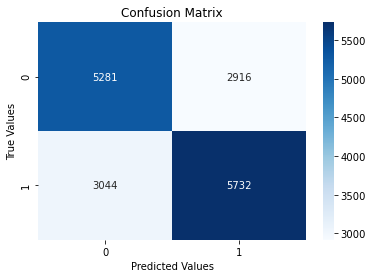

The model achieved an accuracy of:  0.6489
The model achieved a precision of:  0.6628
The model achieved a recall of:  0.6531
The model achieved an f1-score of:  0.6579



(50916, 15)

For  15  features:


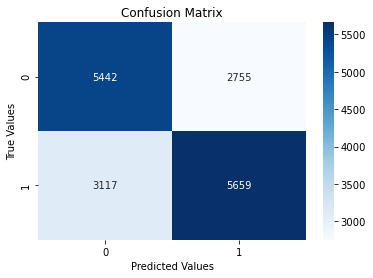

The model achieved an accuracy of:  0.654
The model achieved a precision of:  0.6726
The model achieved a recall of:  0.6448
The model achieved an f1-score of:  0.6584



(50916, 10)

For  10  features:


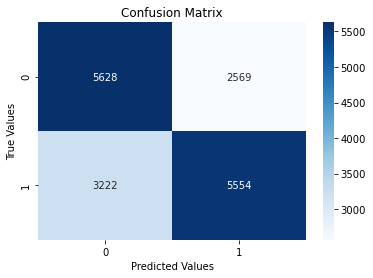

The model achieved an accuracy of:  0.6588
The model achieved a precision of:  0.6837
The model achieved a recall of:  0.6329
The model achieved an f1-score of:  0.6573



(50916, 8)

For  8  features:


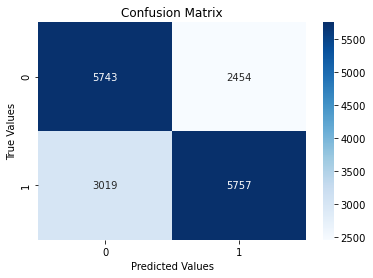

The model achieved an accuracy of:  0.6775
The model achieved a precision of:  0.7011
The model achieved a recall of:  0.656
The model achieved an f1-score of:  0.6778



(50916, 5)

For  5  features:


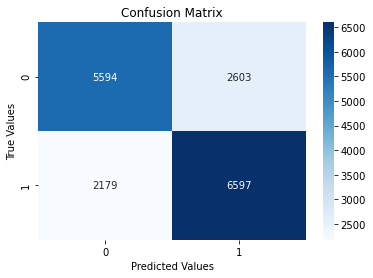

The model achieved an accuracy of:  0.7183
The model achieved a precision of:  0.7171
The model achieved a recall of:  0.7517
The model achieved an f1-score of:  0.734



(50916, 3)

For  3  features:


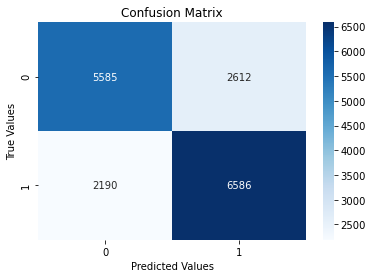

The model achieved an accuracy of:  0.7171
The model achieved a precision of:  0.716
The model achieved a recall of:  0.7505
The model achieved an f1-score of:  0.7328



In [25]:
# Number of features in datasets
n_feat = [21, 15, 10, 8, 5, 3]

for i, n in enumerate(n_feat):
    # Init the model
    d_tree = DecisionTreeClassifier()

    # Train the model
    t0 = time.time()
    disp(train[i].shape)
    d_tree.fit(train[i], train_y)
    t1 = time.time()

    # Get predictions
    predictions = d_tree.predict(test[i])
    
    # Confusion matrix
    cm = confusion_matrix(test_y, predictions)
    
    # Model training time
    t = np.round(t1-t0, 10)
    
    # Performance metrics
    print("For ", n, " features:")
    a, p, r, f = performance(cm)
    print()

    # Append data to dataframe
    test_stats.loc[test_stats.shape[0]] = ['decision_tree',train[i].shape[1],t,a,p,r,f]

<br><br><br><br>
<center>
    <strong>
        <strong><font color='teal' size=5>Random Forest</font></strong> <br><br>
    </strong>
</center>

<strong><font color='maroon' size=4>Train and test model</font></strong> <br><br>

For  21  features:


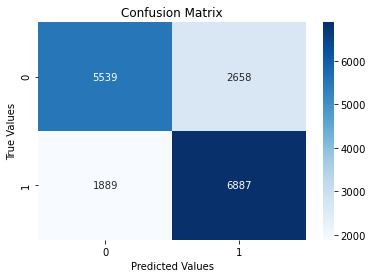

The model achieved an accuracy of:  0.7321
The model achieved a precision of:  0.7215
The model achieved a recall of:  0.7848
The model achieved an f1-score of:  0.7518

For  15  features:


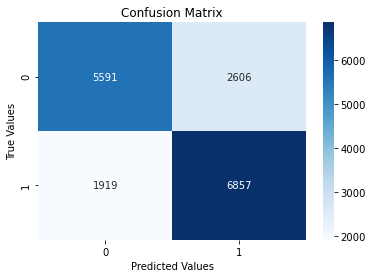

The model achieved an accuracy of:  0.7334
The model achieved a precision of:  0.7246
The model achieved a recall of:  0.7813
The model achieved an f1-score of:  0.7519

For  10  features:


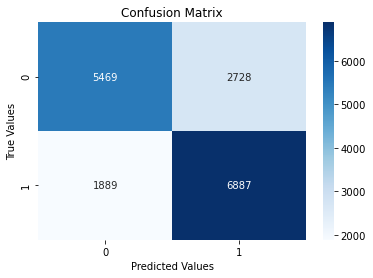

The model achieved an accuracy of:  0.728
The model achieved a precision of:  0.7163
The model achieved a recall of:  0.7848
The model achieved an f1-score of:  0.749

For  8  features:


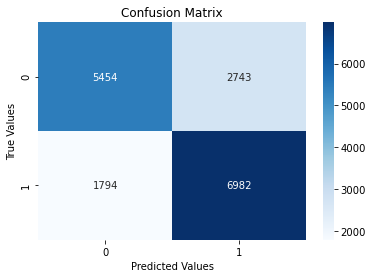

The model achieved an accuracy of:  0.7327
The model achieved a precision of:  0.7179
The model achieved a recall of:  0.7956
The model achieved an f1-score of:  0.7548

For  5  features:


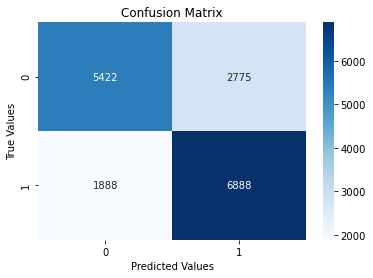

The model achieved an accuracy of:  0.7253
The model achieved a precision of:  0.7128
The model achieved a recall of:  0.7849
The model achieved an f1-score of:  0.7471

For  3  features:


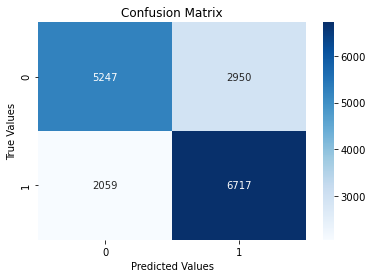

The model achieved an accuracy of:  0.7049
The model achieved a precision of:  0.6948
The model achieved a recall of:  0.7654
The model achieved an f1-score of:  0.7284



In [26]:
# Number of features in datasets
n_feat = [21, 15, 10, 8, 5, 3]

for i, n in enumerate(n_feat):
    # Init the model
    rf = RandomForestClassifier(max_depth=2, random_state=0)

    # Train the model
    t0 = time.time()
    rf.fit(train[i], train_y)
    t1 = time.time()

    # Get predictions
    predictions = rf.predict(test[i])
    
    # Confusion matrix
    cm = confusion_matrix(test_y, predictions)
    
    # Model training time
    t = np.round(t1-t0, 10)
    
    # Performance metrics
    print("For ", n, " features:")
    a, p, r, f = performance(cm)
    print()

    # Append data to dataframe
    test_stats.loc[test_stats.shape[0]] = ['random_forest',train[i].shape[1],t,a,p,r,f]

<br><br><br><br>
<center>
    <strong>
        <strong><font color='teal' size=5>K-Nearest Neighbor</font></strong> <br><br>
    </strong>
</center>

<strong><font color='maroon' size=4>Train and test model</font></strong> <br><br>

For  21  features:


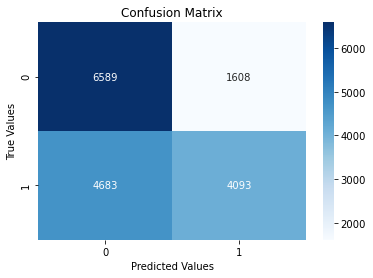

The model achieved an accuracy of:  0.6294
The model achieved a precision of:  0.7179
The model achieved a recall of:  0.4664
The model achieved an f1-score of:  0.5654

For  15  features:


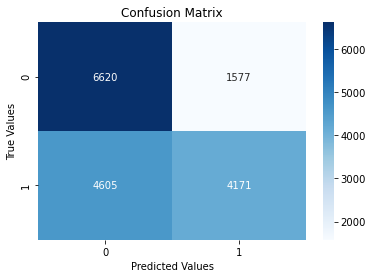

The model achieved an accuracy of:  0.6358
The model achieved a precision of:  0.7256
The model achieved a recall of:  0.4753
The model achieved an f1-score of:  0.5744

For  10  features:


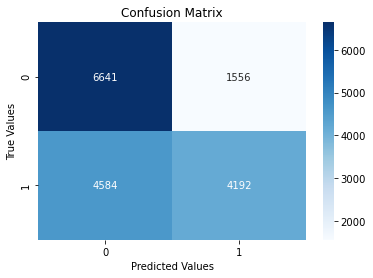

The model achieved an accuracy of:  0.6382
The model achieved a precision of:  0.7293
The model achieved a recall of:  0.4777
The model achieved an f1-score of:  0.5773

For  8  features:


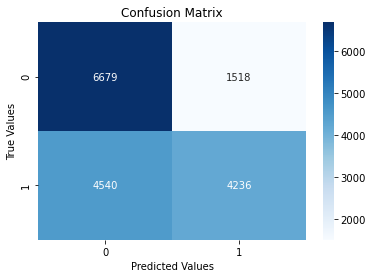

The model achieved an accuracy of:  0.6431
The model achieved a precision of:  0.7362
The model achieved a recall of:  0.4827
The model achieved an f1-score of:  0.5831

For  5  features:


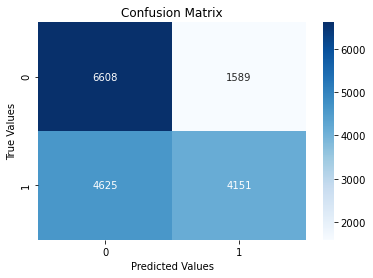

The model achieved an accuracy of:  0.6339
The model achieved a precision of:  0.7232
The model achieved a recall of:  0.473
The model achieved an f1-score of:  0.5719

For  3  features:


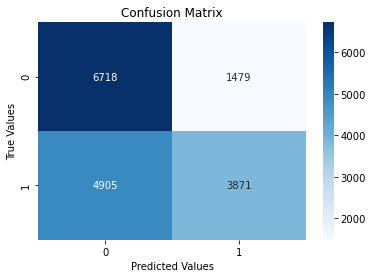

The model achieved an accuracy of:  0.6239
The model achieved a precision of:  0.7236
The model achieved a recall of:  0.4411
The model achieved an f1-score of:  0.5481



In [27]:
for i, n in enumerate(n_feat):
    #Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=2)

    # Train the model
    t0 = time.time()
    knn.fit(train[i], train_y)
    t1 = time.time()
    
    # Get predictions
    predictions = knn.predict(test[i])
    
    # Confusion matrix
    cm = confusion_matrix(test_y, predictions)
    
    # Model training time
    t = np.round(t1-t0, 10)
    
    # Performance metrics
    print("For ", n, " features:")
    a, p, r, f = performance(cm)
    print()

    # Append data to dataframe
    test_stats.loc[test_stats.shape[0]] = ['k_nearest_neighbor',train[i].shape[1],t,a,p,r,f]

<br><br><br><br>
<center>
    <strong>
        <strong><font color='teal' size=5>Support Vector Machine</font></strong> <br><br>
    </strong>
</center>

<strong><font color='maroon' size=4>Train and test model</font></strong> <br><br>

For  21  features:


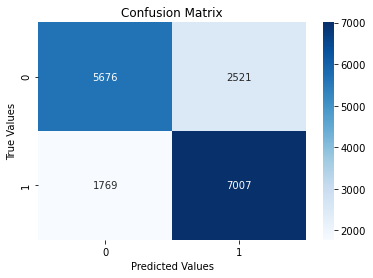

The model achieved an accuracy of:  0.7472
The model achieved a precision of:  0.7354
The model achieved a recall of:  0.7984
The model achieved an f1-score of:  0.7656

For  15  features:


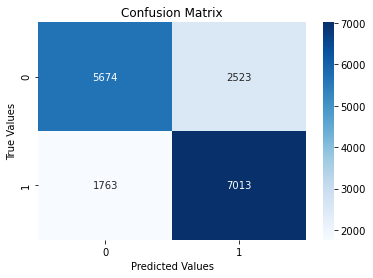

The model achieved an accuracy of:  0.7475
The model achieved a precision of:  0.7354
The model achieved a recall of:  0.7991
The model achieved an f1-score of:  0.7659

For  10  features:


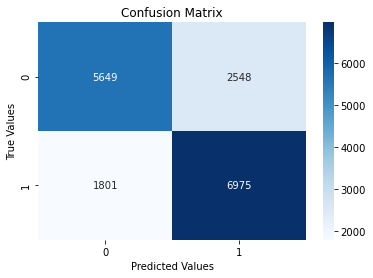

The model achieved an accuracy of:  0.7438
The model achieved a precision of:  0.7324
The model achieved a recall of:  0.7948
The model achieved an f1-score of:  0.7623

For  8  features:


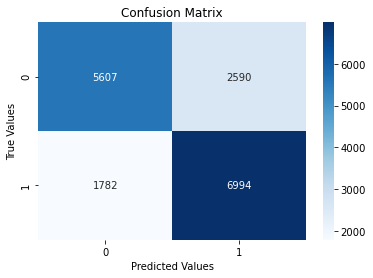

The model achieved an accuracy of:  0.7424
The model achieved a precision of:  0.7298
The model achieved a recall of:  0.7969
The model achieved an f1-score of:  0.7619

For  5  features:


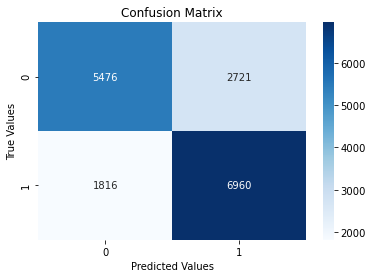

The model achieved an accuracy of:  0.7327
The model achieved a precision of:  0.7189
The model achieved a recall of:  0.7931
The model achieved an f1-score of:  0.7542

For  3  features:


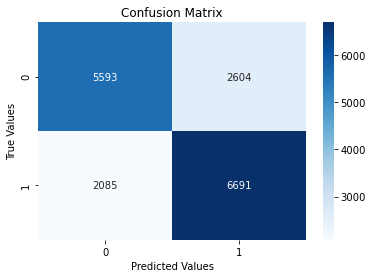

The model achieved an accuracy of:  0.7237
The model achieved a precision of:  0.7198
The model achieved a recall of:  0.7624
The model achieved an f1-score of:  0.7405



In [28]:
for i, n in enumerate(n_feat):
    # Create a svm classifier
    sv = svm.SVC(kernel='linear')

    # Train the model
    t0 = time.time()
    sv.fit(train[i], train_y)
    t1 = time.time()

    # Get predictions
    predictions = sv.predict(test[i])
    
    # Confusion matrix
    cm = confusion_matrix(test_y, predictions)
    
    # Model training time
    t = np.round(t1-t0, 10)
    
    # Performance metrics
    print("For ", n, " features:")
    a, p, r, f = performance(cm)
    print()

    # Append data to dataframe
    test_stats.loc[test_stats.shape[0]] = ['support_vector_machine',train[i].shape[1],t,a,p,r,f]

<br><br><br><br>
<center>
    <strong>
        <strong><font color='teal' size=5>Performance data for each classifier</font></strong> <br><br>
    </strong>
</center>

In [29]:
# Display the data we stored
test_stats

,classifier,n_features,train_time,accuracy,precision,recall,f1_score
0,decision_tree,21,0.265041,0.6489,0.6628,0.6531,0.6579
1,decision_tree,15,0.166039,0.6540,0.6726,0.6448,0.6584
2,decision_tree,10,0.115042,0.6588,0.6837,0.6329,0.6573
3,decision_tree,8,0.090038,0.6775,0.7011,0.6560,0.6778
4,decision_tree,5,0.044042,0.7183,0.7171,0.7517,0.7340
5,decision_tree,3,0.032999,0.7171,0.7160,0.7505,0.7328
6,random_forest,21,0.810014,0.7321,0.7215,0.7848,0.7518
7,random_forest,15,0.738999,0.7334,0.7246,0.7813,0.7519
8,random_forest,10,0.766060,0.7280,0.7163,0.7848,0.7490
9,random_forest,8,0.664046,0.7327,0.7179,0.7956,0.7548


<br><br>
<center>
    <strong>
        <strong><font color='orange' size=5>Regularized Random Forest</font></strong> <br><br>
    </strong>
</center>

<strong><font color='maroon' size=4>Store important data</font></strong> <br><br>

In [30]:
"""
n_features: The number of features in the subset.
time: Time taken to obtain the most important features (in seconds).
features: A list of the most important features.

"""

rrf_stats = pd.DataFrame(columns=['Feature', 'Importance'])

<strong><font color='maroon' size=4>Get subsets of important features</font></strong>

In [31]:
# Init the transformer
rrf = RandomForestRegressor(n_estimators = 100, min_samples_split=4, min_samples_leaf=2,
                            max_features="sqrt", max_depth=6)

# Fit to the training data
rrf.fit(train_X, train_y)

RandomForestRegressor(max_depth=6, max_features='sqrt', min_samples_leaf=2,
                      min_samples_split=4)

<strong><font color='maroon' size=4>Display subsets of important features</font></strong>

In [32]:
# Display the data we stored
rrf_stats['Feature'] = train_X.columns.to_list()
rrf_stats['Importance'] = list(rrf.feature_importances_)
rrf_stats = rrf_stats.sort_values(by='Importance', ascending=False, axis=0).reset_index(drop=True)
rrf_stats = rrf_stats.set_index('Feature')


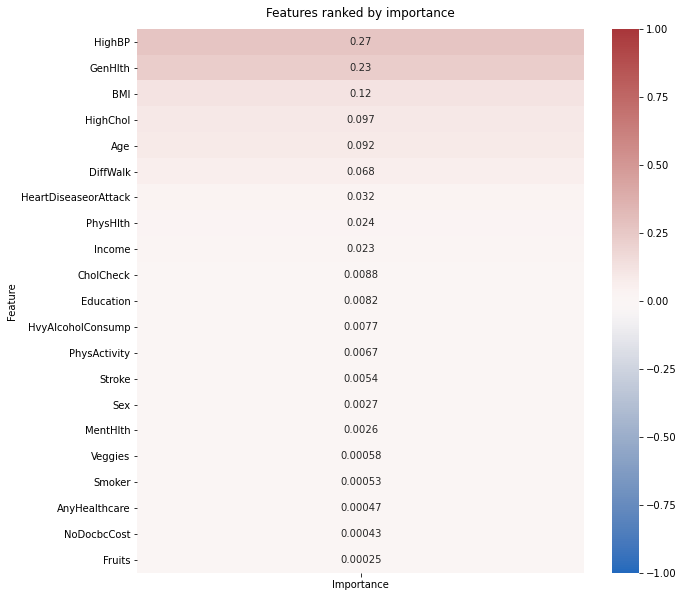

In [33]:
# Plot heatmap
heatmap = plt.subplots(figsize=(10, 10))
heatmap = sns.heatmap(rrf_stats, vmin=-1, vmax=1, annot=True, cmap=hc, )
heatmap.set_title('Features ranked by importance', fontdict={'fontsize':12}, pad=12);

In [34]:
n_feat = [21, 15, 10, 8, 5, 3]
rff_subsets = []
rrf_stats = rrf_stats.reset_index()

# Display the subsets of features
for i, n in enumerate(n_feat):
    subset = list(rrf_stats.Feature.loc[:n -1])
    rff_subsets.append(subset)
    print("Regularized Random Forest for ", n, " features: ")
    print(subset)
    print()

Regularized Random Forest for  21  features: 
['HighBP', 'GenHlth', 'BMI', 'HighChol', 'Age', 'DiffWalk', 'HeartDiseaseorAttack', 'PhysHlth', 'Income', 'CholCheck', 'Education', 'HvyAlcoholConsump', 'PhysActivity', 'Stroke', 'Sex', 'MentHlth', 'Veggies', 'Smoker', 'AnyHealthcare', 'NoDocbcCost', 'Fruits']

Regularized Random Forest for  15  features: 
['HighBP', 'GenHlth', 'BMI', 'HighChol', 'Age', 'DiffWalk', 'HeartDiseaseorAttack', 'PhysHlth', 'Income', 'CholCheck', 'Education', 'HvyAlcoholConsump', 'PhysActivity', 'Stroke', 'Sex']

Regularized Random Forest for  10  features: 
['HighBP', 'GenHlth', 'BMI', 'HighChol', 'Age', 'DiffWalk', 'HeartDiseaseorAttack', 'PhysHlth', 'Income', 'CholCheck']

Regularized Random Forest for  8  features: 
['HighBP', 'GenHlth', 'BMI', 'HighChol', 'Age', 'DiffWalk', 'HeartDiseaseorAttack', 'PhysHlth']

Regularized Random Forest for  5  features: 
['HighBP', 'GenHlth', 'BMI', 'HighChol', 'Age']

Regularized Random Forest for  3  features: 
['HighBP', '

<br><br>
<center>
    <strong>
        <font color='orange' size=5>Testing model performance with different numbers of features</font> <br> <br>
    </strong>
</center>

<strong><font color='maroon' size=4>Store important data</font></strong>

In [35]:
# Stats
test_stats_2 = pd.DataFrame(columns=['classifier', 'n_features', 'train_time', 'accuracy', 'precision', 'recall', 'f1_score'])
test_stats_2

,classifier,n_features,train_time,accuracy,precision,recall,f1_score


<strong><font color='maroon' size=4>Subsets of the data (different number of features)</font></strong>

In [36]:
# Train and test subsets
train = []
test = []

# Split data into subsets
for features in rff_subsets:
    train_i = train_X[features]
    test_i = test_X[features]
    
    train.append(train_i)
    test.append(test_i)

<br><br><br><br>
<center>
    <strong>
        <font color='orange' size=5>Decision Trees</font> <br> <br>
    </strong>
</center>

<strong><font color='maroon' size=4>Train and test model</font></strong>

For  21  features:


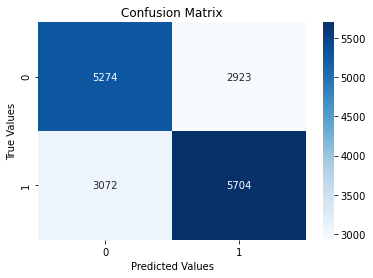

The model achieved an accuracy of:  0.6468
The model achieved a precision of:  0.6612
The model achieved a recall of:  0.65
The model achieved an f1-score of:  0.6555

For  15  features:


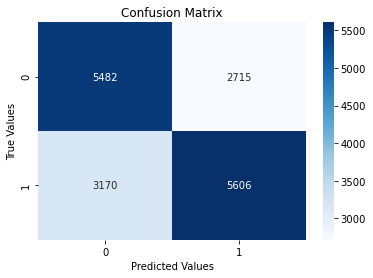

The model achieved an accuracy of:  0.6533
The model achieved a precision of:  0.6737
The model achieved a recall of:  0.6388
The model achieved an f1-score of:  0.6558

For  10  features:


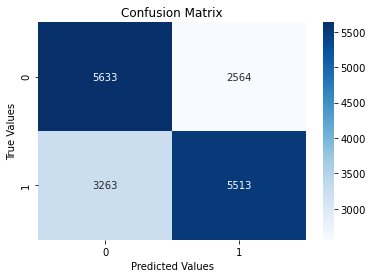

The model achieved an accuracy of:  0.6567
The model achieved a precision of:  0.6826
The model achieved a recall of:  0.6282
The model achieved an f1-score of:  0.6542

For  8  features:


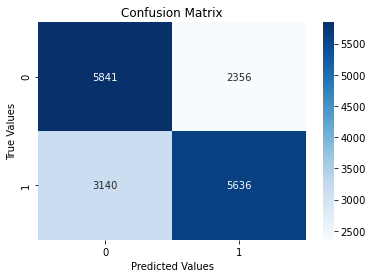

The model achieved an accuracy of:  0.6762
The model achieved a precision of:  0.7052
The model achieved a recall of:  0.6422
The model achieved an f1-score of:  0.6722

For  5  features:


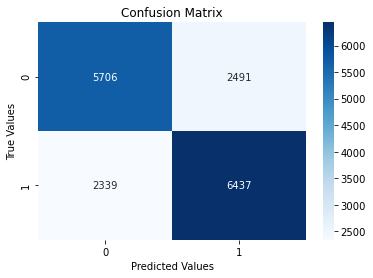

The model achieved an accuracy of:  0.7154
The model achieved a precision of:  0.721
The model achieved a recall of:  0.7335
The model achieved an f1-score of:  0.7272

For  3  features:


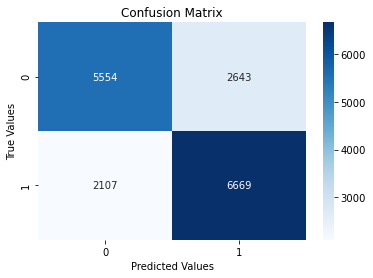

The model achieved an accuracy of:  0.7201
The model achieved a precision of:  0.7162
The model achieved a recall of:  0.7599
The model achieved an f1-score of:  0.7374



In [37]:
for i, n in enumerate(n_feat):
    # Init the model
    d_tree = DecisionTreeClassifier()

    # Train the model
    t0 = time.time()
    d_tree.fit(train[i], train_y)
    t1 = time.time()

    # Get predictions
    predictions = d_tree.predict(test[i])
    
    # Confusion matrix
    cm = confusion_matrix(test_y, predictions)
    
    # Model training time
    t = np.round(t1-t0, 10)
    
    # Performance metrics
    print("For ", n, " features:")
    a, p, r, f = performance(cm)
    print()

    # Append data to dataframe
    test_stats_2.loc[test_stats_2.shape[0]] = ['decision_tree',train[i].shape[1],t,a,p,r,f]

<br><br><br><br>
<center>
    <strong>
        <strong><font color='orange' size=5>Random Forest</font></strong> <br><br>
    </strong>
</center>

<strong><font color='maroon' size=4>Train and test model</font></strong> <br><br>

For  21  features:


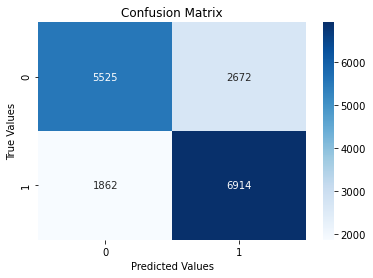

The model achieved an accuracy of:  0.7329
The model achieved a precision of:  0.7213
The model achieved a recall of:  0.7878
The model achieved an f1-score of:  0.7531

For  15  features:


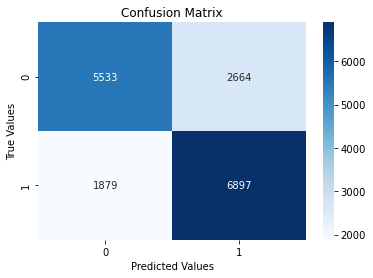

The model achieved an accuracy of:  0.7323
The model achieved a precision of:  0.7214
The model achieved a recall of:  0.7859
The model achieved an f1-score of:  0.7522

For  10  features:


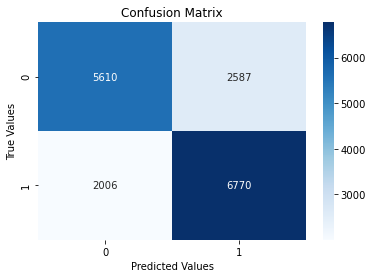

The model achieved an accuracy of:  0.7294
The model achieved a precision of:  0.7235
The model achieved a recall of:  0.7714
The model achieved an f1-score of:  0.7467

For  8  features:


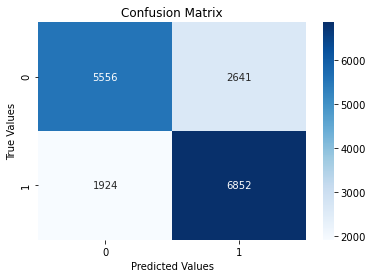

The model achieved an accuracy of:  0.731
The model achieved a precision of:  0.7218
The model achieved a recall of:  0.7808
The model achieved an f1-score of:  0.7501

For  5  features:


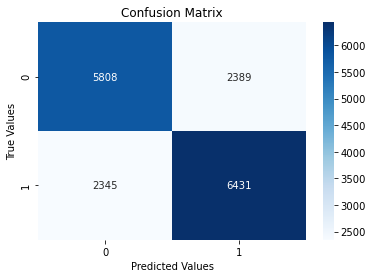

The model achieved an accuracy of:  0.7211
The model achieved a precision of:  0.7291
The model achieved a recall of:  0.7328
The model achieved an f1-score of:  0.731

For  3  features:


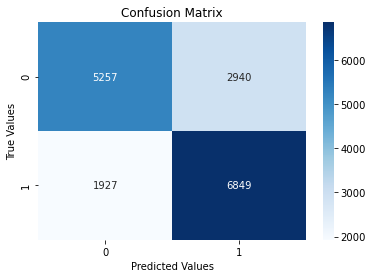

The model achieved an accuracy of:  0.7133
The model achieved a precision of:  0.6997
The model achieved a recall of:  0.7804
The model achieved an f1-score of:  0.7378



In [38]:
for i, n in enumerate(n_feat):
    # Init the model
    rf = RandomForestClassifier(max_depth=2, random_state=0)

    # Train the model
    t0 = time.time()
    rf.fit(train[i], train_y)
    t1 = time.time()

    # Get predictions
    predictions = rf.predict(test[i])
    
    # Confusion matrix
    cm = confusion_matrix(test_y, predictions)
    
    # Model training time
    t = np.round(t1-t0, 10)
    
    # Performance metrics
    print("For ", n, " features:")
    a, p, r, f = performance(cm)
    print()

    # Append data to dataframe
    test_stats_2.loc[test_stats_2.shape[0]] = ['random_forest',train[i].shape[1],t,a,p,r,f]

<br><br><br><br>
<center>
    <strong>
        <strong><font color='orange' size=5>K-Nearest Neighbor</font></strong> <br><br>
    </strong>
</center>

<strong><font color='maroon' size=4>Train and test model</font></strong> <br><br>

For  21  features:


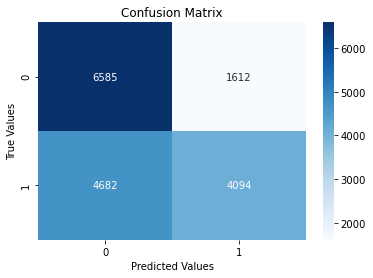

The model achieved an accuracy of:  0.6292
The model achieved a precision of:  0.7175
The model achieved a recall of:  0.4665
The model achieved an f1-score of:  0.5654

For  15  features:


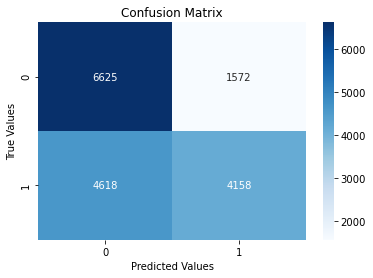

The model achieved an accuracy of:  0.6353
The model achieved a precision of:  0.7257
The model achieved a recall of:  0.4738
The model achieved an f1-score of:  0.5733

For  10  features:


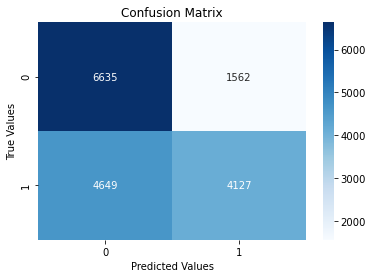

The model achieved an accuracy of:  0.6341
The model achieved a precision of:  0.7254
The model achieved a recall of:  0.4703
The model achieved an f1-score of:  0.5706

For  8  features:


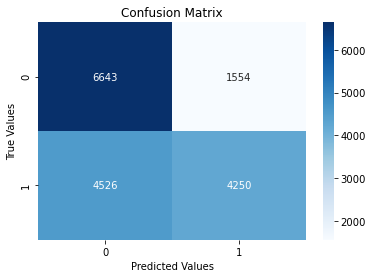

The model achieved an accuracy of:  0.6418
The model achieved a precision of:  0.7323
The model achieved a recall of:  0.4843
The model achieved an f1-score of:  0.583

For  5  features:


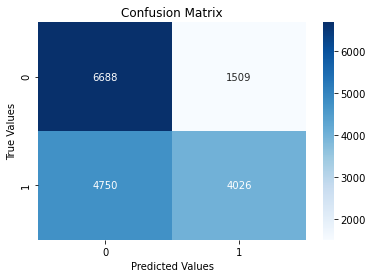

The model achieved an accuracy of:  0.6312
The model achieved a precision of:  0.7274
The model achieved a recall of:  0.4588
The model achieved an f1-score of:  0.5626

For  3  features:


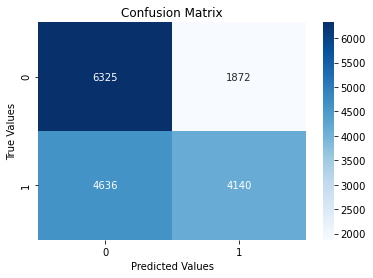

The model achieved an accuracy of:  0.6166
The model achieved a precision of:  0.6886
The model achieved a recall of:  0.4717
The model achieved an f1-score of:  0.5599



In [39]:
for i, n in enumerate(n_feat):
    #Create KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=2)

    # Train the model
    t0 = time.time()
    knn.fit(train[i], train_y)
    t1 = time.time()
    
    # Get predictions
    predictions = knn.predict(test[i])
    
    # Confusion matrix
    cm = confusion_matrix(test_y, predictions)
    
    # Model training time
    t = np.round(t1-t0, 10)
    
    # Performance metrics
    print("For ", n, " features:")
    a, p, r, f = performance(cm)
    print()

    # Append data to dataframe
    test_stats_2.loc[test_stats_2.shape[0]] = ['k_nearest_neighbor',train[i].shape[1],t,a,p,r,f]

<br><br><br><br>
<center>
    <strong>
        <strong><font color='orange' size=5>Support Vector Machine</font></strong> <br><br>
    </strong>
</center>

<strong><font color='maroon' size=4>Train and test model</font></strong> <br><br>

For  21  features:


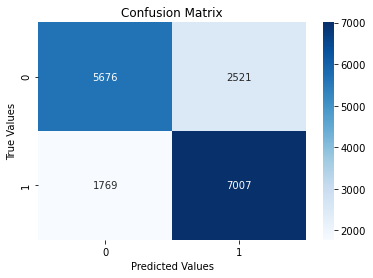

The model achieved an accuracy of:  0.7472
The model achieved a precision of:  0.7354
The model achieved a recall of:  0.7984
The model achieved an f1-score of:  0.7656

For  15  features:


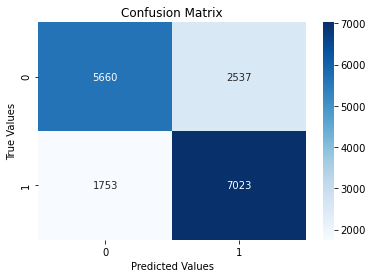

The model achieved an accuracy of:  0.7472
The model achieved a precision of:  0.7346
The model achieved a recall of:  0.8003
The model achieved an f1-score of:  0.766

For  10  features:


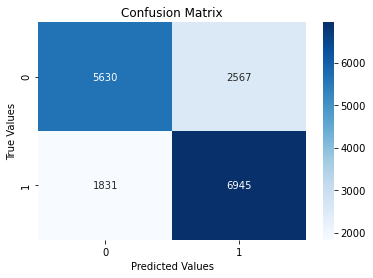

The model achieved an accuracy of:  0.7409
The model achieved a precision of:  0.7301
The model achieved a recall of:  0.7914
The model achieved an f1-score of:  0.7595

For  8  features:


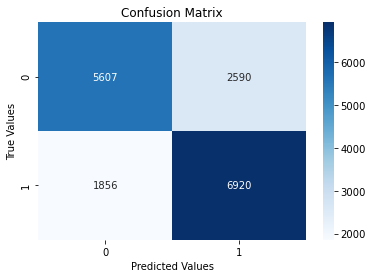

The model achieved an accuracy of:  0.7381
The model achieved a precision of:  0.7277
The model achieved a recall of:  0.7885
The model achieved an f1-score of:  0.7569

For  5  features:


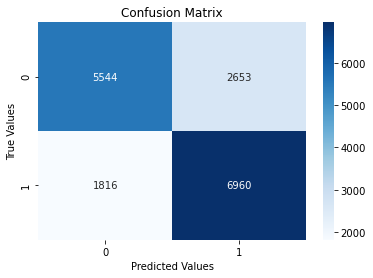

The model achieved an accuracy of:  0.7367
The model achieved a precision of:  0.724
The model achieved a recall of:  0.7931
The model achieved an f1-score of:  0.757

For  3  features:


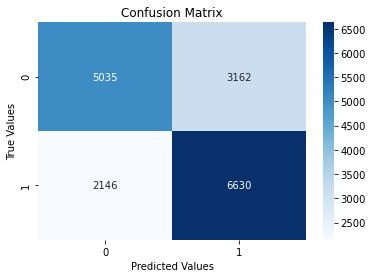

The model achieved an accuracy of:  0.6873
The model achieved a precision of:  0.6771
The model achieved a recall of:  0.7555
The model achieved an f1-score of:  0.7141



In [40]:
for i, n in enumerate(n_feat):
    # Create a svm classifier
    sv = svm.SVC(kernel='linear')

    # Train the model
    t0 = time.time()
    sv.fit(train[i], train_y)
    t1 = time.time()

    # Get predictions
    predictions = sv.predict(test[i])
    
    # Confusion matrix
    cm = confusion_matrix(test_y, predictions)
    
    # Model training time
    t = np.round(t1-t0, 10)
    
    # Performance metrics
    print("For ", n, " features:")
    a, p, r, f = performance(cm)
    print()

    # Append data to dataframe
    test_stats_2.loc[test_stats_2.shape[0]] = ['support_vector_machine',train[i].shape[1],t,a,p,r,f]

<br><br><br><br>
<center>
    <strong>
        <strong><font color='orange' size=5>Performance data for each classifier</font></strong> <br><br>
    </strong>
</center>

In [41]:
# Display the data we stored
test_stats_2

,classifier,n_features,train_time,accuracy,precision,recall,f1_score
0,decision_tree,21,0.214985,0.6468,0.6612,0.6500,0.6555
1,decision_tree,15,0.157038,0.6533,0.6737,0.6388,0.6558
2,decision_tree,10,0.135995,0.6567,0.6826,0.6282,0.6542
3,decision_tree,8,0.079998,0.6762,0.7052,0.6422,0.6722
4,decision_tree,5,0.042999,0.7154,0.7210,0.7335,0.7272
5,decision_tree,3,0.027998,0.7201,0.7162,0.7599,0.7374
6,random_forest,21,0.873043,0.7329,0.7213,0.7878,0.7531
7,random_forest,15,0.823037,0.7323,0.7214,0.7859,0.7522
8,random_forest,10,0.818998,0.7294,0.7235,0.7714,0.7467
9,random_forest,8,0.957041,0.7310,0.7218,0.7808,0.7501


<br><br>
<center>
    <strong>
        <strong><font color='lime' size=5>Results</font></strong> <br><br>
    </strong>
</center>

In [42]:
# Figure settings
sns.set_style("darkgrid")

In [43]:
# RFE
dt_stats_1 = test_stats[test_stats['classifier'] == 'decision_tree']
rf_stats_1 = test_stats[test_stats['classifier'] == 'random_forest']
knn_stats_1 = test_stats[test_stats['classifier'] == 'k_nearest_neighbor']
svm_stats_1 = test_stats[test_stats['classifier'] == 'support_vector_machine']

# RRF
dt_stats_2 = test_stats_2[test_stats_2['classifier'] == 'decision_tree']
rf_stats_2 = test_stats[test_stats['classifier'] == 'random_forest']
knn_stats_2 = test_stats_2[test_stats_2['classifier'] == 'k_nearest_neighbor']
svm_stats_2 = test_stats_2[test_stats_2['classifier'] == 'support_vector_machine']

<strong><font color='maroon' size=4>Training Time</font></strong>

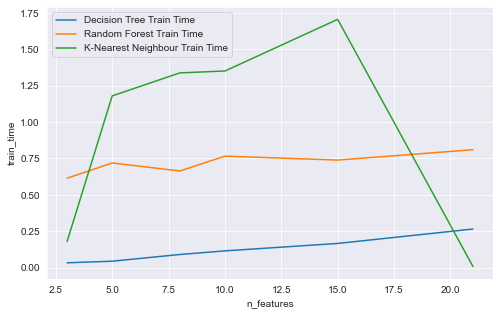

In [44]:
# Size settings
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 8
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

metric = 'train_time'

# Decision Tree
sns.lineplot(data=dt_stats_1, x='n_features', y=metric);

# Random Forest
sns.lineplot(data=rf_stats_1, x='n_features', y=metric);

# K Nearest Neighbour
sns.lineplot(data=knn_stats_1, x='n_features', y=metric);

plt.legend(['Decision Tree Train Time', 'Random Forest Train Time', 'K-Nearest Neighbour Train Time']);

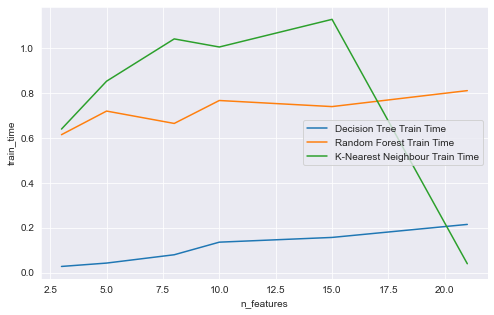

In [45]:
# Decision Tree
sns.lineplot(data=dt_stats_2, x='n_features', y=metric);

# Random Forest
sns.lineplot(data=rf_stats_2, x='n_features', y=metric);

# K Nearest Neighbour
sns.lineplot(data=knn_stats_2, x='n_features', y=metric);

plt.legend(['Decision Tree Train Time', 'Random Forest Train Time', 'K-Nearest Neighbour Train Time']);

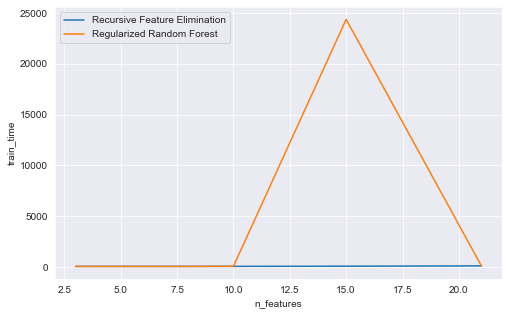

In [46]:
# Support Vector Machine
sns.lineplot(data=svm_stats_1, x='n_features', y=metric);
sns.lineplot(data=svm_stats_2, x='n_features', y=metric);

plt.legend(['Recursive Feature Elimination', 'Regularized Random Forest']);

<strong><font color='maroon' size=4>Accuracy</font></strong>

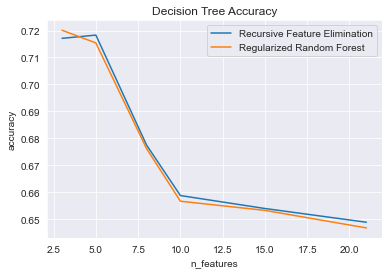

In [47]:
# Size settings
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 6
fig_size[1] = 4
plt.rcParams["figure.figsize"] = fig_size

metric = 'accuracy'

# Decision Tree
sns.lineplot(data=dt_stats_1, x='n_features', y=metric).set_title('Decision Tree Accuracy');
sns.lineplot(data=dt_stats_2, x='n_features', y=metric).set_title('Decision Tree Accuracy');

plt.legend(['Recursive Feature Elimination', 'Regularized Random Forest']);

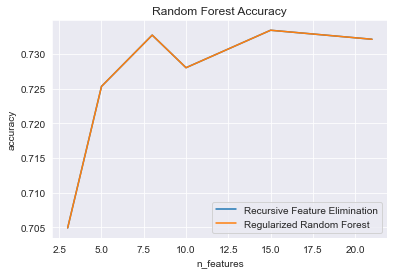

In [48]:
# Random Forest
sns.lineplot(data=rf_stats_1, x='n_features', y=metric).set_title('Random Forest Accuracy');
sns.lineplot(data=rf_stats_2, x='n_features', y=metric).set_title('Random Forest Accuracy');


plt.legend(['Recursive Feature Elimination', 'Regularized Random Forest']);

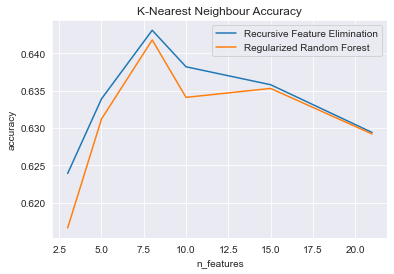

In [49]:
# K Nearest Neighbour
sns.lineplot(data=knn_stats_1, x='n_features', y=metric).set_title('K-Nearest Neighbour Accuracy');
sns.lineplot(data=knn_stats_2, x='n_features', y=metric).set_title('K-Nearest Neighbour Accuracy');

plt.legend(['Recursive Feature Elimination', 'Regularized Random Forest']);

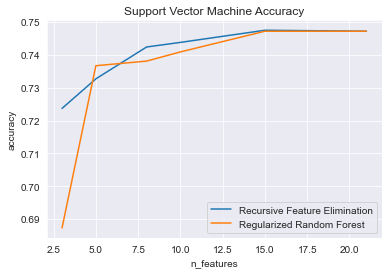

In [50]:
# Support Vector Machine
sns.lineplot(data=svm_stats_1, x='n_features', y=metric).set_title('Support Vector Machine Accuracy');
sns.lineplot(data=svm_stats_2, x='n_features', y=metric).set_title('Support Vector Machine Accuracy');


plt.legend(['Recursive Feature Elimination', 'Regularized Random Forest']);

<strong><font color='maroon' size=4>Precision</font></strong>

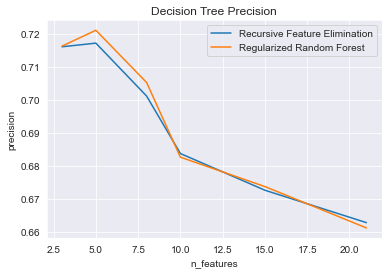

In [51]:
metric = 'precision'
# Decision Tree
sns.lineplot(data=dt_stats_1, x='n_features', y=metric).set_title('Decision Tree Precision');
sns.lineplot(data=dt_stats_2, x='n_features', y=metric).set_title('Decision Tree Precision');

plt.legend(['Recursive Feature Elimination', 'Regularized Random Forest']);

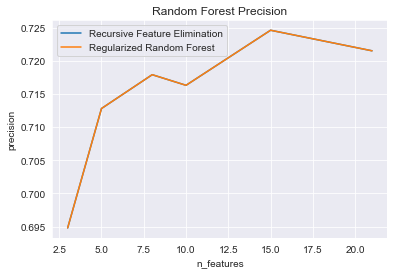

In [52]:
# Random Forest
sns.lineplot(data=rf_stats_1, x='n_features', y=metric).set_title('Random Forest Precision');
sns.lineplot(data=rf_stats_2, x='n_features', y=metric).set_title('Random Forest Precision');

plt.legend(['Recursive Feature Elimination', 'Regularized Random Forest']);

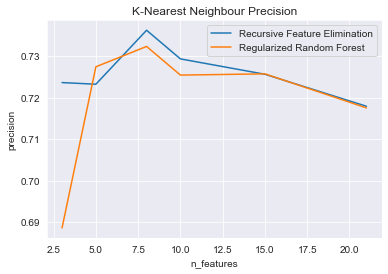

In [53]:
# K Nearest Neighbour
sns.lineplot(data=knn_stats_1, x='n_features', y=metric).set_title('K-Nearest Neighbour Precision');
sns.lineplot(data=knn_stats_2, x='n_features', y=metric).set_title('K-Nearest Neighbour Precision');

plt.legend(['Recursive Feature Elimination', 'Regularized Random Forest']);

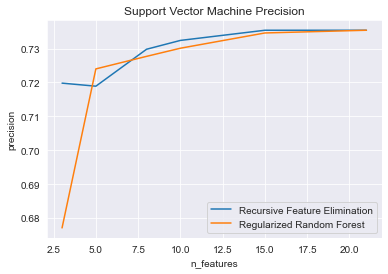

In [54]:
# Support Vector Machine
sns.lineplot(data=svm_stats_1, x='n_features', y=metric).set_title('Support Vector Machine Precision');
sns.lineplot(data=svm_stats_2, x='n_features', y=metric).set_title('Support Vector Machine Precision');

plt.legend(['Recursive Feature Elimination', 'Regularized Random Forest']);

<strong><font color='maroon' size=4>Recall</font></strong>

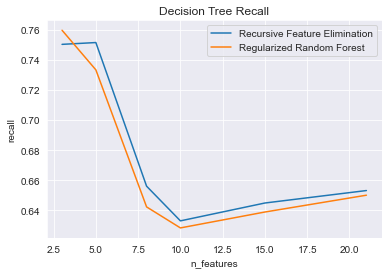

In [55]:
metric = 'recall'
# Decision Tree
sns.lineplot(data=dt_stats_1, x='n_features', y=metric).set_title('Decision Tree Recall');
sns.lineplot(data=dt_stats_2, x='n_features', y=metric).set_title('Decision Tree Recall');

plt.legend(['Recursive Feature Elimination', 'Regularized Random Forest']);

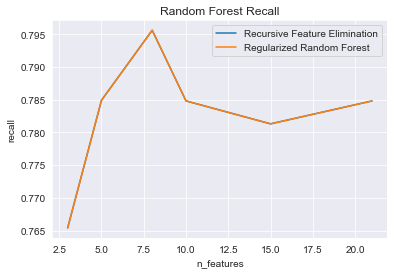

In [56]:
# Random Forest
sns.lineplot(data=rf_stats_1, x='n_features', y=metric).set_title('Random Forest Recall');
sns.lineplot(data=rf_stats_2, x='n_features', y=metric).set_title('Random Forest Recall');

plt.legend(['Recursive Feature Elimination', 'Regularized Random Forest']);

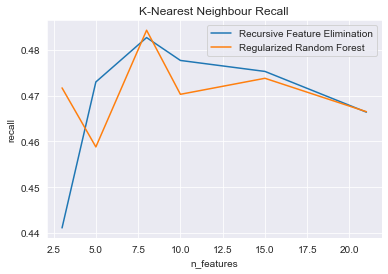

In [57]:
# K Nearest Neighbour
sns.lineplot(data=knn_stats_1, x='n_features', y=metric).set_title('K-Nearest Neighbour Recall');
sns.lineplot(data=knn_stats_2, x='n_features', y=metric).set_title('K-Nearest Neighbour Recall');

plt.legend(['Recursive Feature Elimination', 'Regularized Random Forest']);

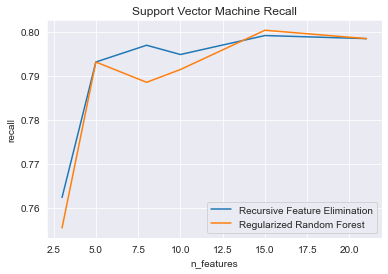

In [58]:
# Support Vector Machine
sns.lineplot(data=svm_stats_1, x='n_features', y=metric).set_title('Support Vector Machine Recall');
sns.lineplot(data=svm_stats_2, x='n_features', y=metric).set_title('Support Vector Machine Recall');

plt.legend(['Recursive Feature Elimination', 'Regularized Random Forest']);

<strong><font color='maroon' size=4>F1-Score</font></strong>

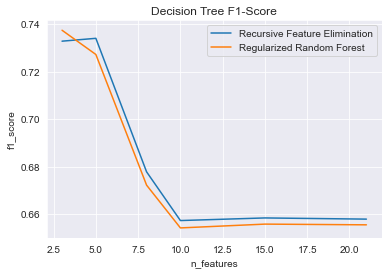

In [59]:
metric = 'f1_score'
# Decision Tree
sns.lineplot(data=dt_stats_1, x='n_features', y=metric).set_title('Decision Tree F1-Score');
sns.lineplot(data=dt_stats_2, x='n_features', y=metric).set_title('Decision Tree F1-Score');

plt.legend(['Recursive Feature Elimination', 'Regularized Random Forest']);

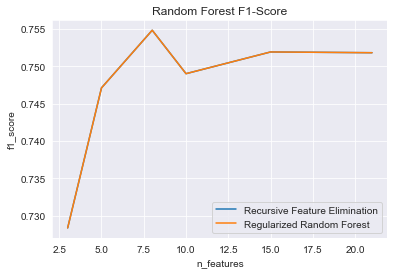

In [60]:
# Random Forest
sns.lineplot(data=rf_stats_1, x='n_features', y=metric).set_title('Random Forest F1-Score');
sns.lineplot(data=rf_stats_2, x='n_features', y=metric).set_title('Random Forest F1-Score');


plt.legend(['Recursive Feature Elimination', 'Regularized Random Forest']);

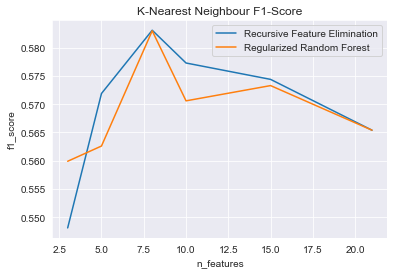

In [61]:
# K Nearest Neighbour
sns.lineplot(data=knn_stats_1, x='n_features', y=metric).set_title('K-Nearest Neighbour F1-Score');
sns.lineplot(data=knn_stats_2, x='n_features', y=metric).set_title('K-Nearest Neighbour F1-Score');


plt.legend(['Recursive Feature Elimination', 'Regularized Random Forest']);

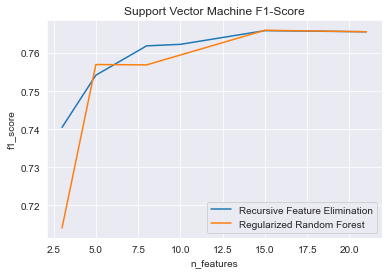

In [62]:
# Support Vector Machine
sns.lineplot(data=svm_stats_1, x='n_features', y=metric).set_title('Support Vector Machine F1-Score');
sns.lineplot(data=svm_stats_2, x='n_features', y=metric).set_title('Support Vector Machine F1-Score');


plt.legend(['Recursive Feature Elimination', 'Regularized Random Forest']);

In [63]:
disp(test_stats, test_stats_2)

,classifier,n_features,train_time,accuracy,precision,recall,f1_score
0,decision_tree,21,0.265041,0.6489,0.6628,0.6531,0.6579
1,decision_tree,15,0.166039,0.6540,0.6726,0.6448,0.6584
2,decision_tree,10,0.115042,0.6588,0.6837,0.6329,0.6573
3,decision_tree,8,0.090038,0.6775,0.7011,0.6560,0.6778
4,decision_tree,5,0.044042,0.7183,0.7171,0.7517,0.7340
5,decision_tree,3,0.032999,0.7171,0.7160,0.7505,0.7328
6,random_forest,21,0.810014,0.7321,0.7215,0.7848,0.7518
7,random_forest,15,0.738999,0.7334,0.7246,0.7813,0.7519
8,random_forest,10,0.766060,0.7280,0.7163,0.7848,0.7490
9,random_forest,8,0.664046,0.7327,0.7179,0.7956,0.7548


,classifier,n_features,train_time,accuracy,precision,recall,f1_score
0,decision_tree,21,0.214985,0.6468,0.6612,0.6500,0.6555
1,decision_tree,15,0.157038,0.6533,0.6737,0.6388,0.6558
2,decision_tree,10,0.135995,0.6567,0.6826,0.6282,0.6542
3,decision_tree,8,0.079998,0.6762,0.7052,0.6422,0.6722
4,decision_tree,5,0.042999,0.7154,0.7210,0.7335,0.7272
5,decision_tree,3,0.027998,0.7201,0.7162,0.7599,0.7374
6,random_forest,21,0.873043,0.7329,0.7213,0.7878,0.7531
7,random_forest,15,0.823037,0.7323,0.7214,0.7859,0.7522
8,random_forest,10,0.818998,0.7294,0.7235,0.7714,0.7467
9,random_forest,8,0.957041,0.7310,0.7218,0.7808,0.7501


In [64]:
disp(test_stats[test_stats['n_features'] == 21], test_stats_2[test_stats_2['n_features'] == 21])

,classifier,n_features,train_time,accuracy,precision,recall,f1_score
0,decision_tree,21,0.265041,0.6489,0.6628,0.6531,0.6579
6,random_forest,21,0.810014,0.7321,0.7215,0.7848,0.7518
12,k_nearest_neighbor,21,0.008005,0.6294,0.7179,0.4664,0.5654
18,support_vector_machine,21,117.538305,0.7472,0.7354,0.7984,0.7656


,classifier,n_features,train_time,accuracy,precision,recall,f1_score
0,decision_tree,21,0.214985,0.6468,0.6612,0.6500,0.6555
6,random_forest,21,0.873043,0.7329,0.7213,0.7878,0.7531
12,k_nearest_neighbor,21,0.039999,0.6292,0.7175,0.4665,0.5654
18,support_vector_machine,21,112.055999,0.7472,0.7354,0.7984,0.7656


In [65]:
test_stats.to_csv('rfe.csv')
test_stats_2.to_csv('rrf.csv')